# Homework 3: Implementation of a classifier perceptron for binary classification  
## Universidad de Monterrey  
### School of Engineering and Technologies  

**Virgilio Del Bosque Luna 578255 | Ingeniería en Mecatrónica**  
**Course:** Artificial Intelligence II  
**Lecturer:** Dr. Andrés Hernández Gutiérrez  
**Due date:** Thursday 19 August 2023, before midnight


San Pedro Garza García, Nuevo León  
*"Doy mi palabra de que he realizado esta actividad con integridad académica"*


### **1. Instalación e importación de librerías**

Se instala la librería ucimlrepo.

Se importan las librerías necesarias para el desarrollo del programa.

In [12]:

#!pip install ucimlrepo #Permite acceder a datasets de la UCI "Machine Learning Repository".

from ucimlrepo import fetch_ucirepo #Permite el acceso al dataset desde UCI.
from sklearn.model_selection import train_test_split #División de datos en entrenamiento y prueba.
import pandas as pd #Permite la manipulación y análisis de datos.
import matplotlib.pyplot as plt #Permite generar gráficos.
import numpy as np #Permite la creación de vectores, matrices multidimensionales y funciones matemáticas de alto nivel.
import tensorflow as tf #Facilita la creación de modelos de aprendizaje automático. 
from sklearn.preprocessing import StandardScaler #Estándariza los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1.
#Normalización de datos.

La salida de la celda es de la línea de"!pip install ucimlrepo" y lo que se ve son las cargas de la instalación de la librería junto con sus versiones.


### **2. Descarga del dataset**

Se descarga el dataset "occupancy-detection" y extraen los datos.

In [13]:
# Download `occupancy-detection` dataset
# using the id=357
occupancy_detection = fetch_ucirepo(id=357) #Se descarga el conjunto de datos desde el repositorio UCI.

# Build the feature and the target data sets
data = occupancy_detection.data.original #Extracción de los datos originales del conjunto de datos que se descargó.


No hay salida de esta celda, únicamente se cargan los datos.

### **3. Preparación de datos**

Se arreglan los datos para usar en el modelo.

In [14]:
df = data.drop(['date', 'id'], axis=1) #Se eliminan las columnas "date" y "id" esto porque no sirven para el modelo.
df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce') #Se asegura que todas las columnas sean numéricas.
#"coerce" se refiere a "entonces el análisis no válido se establecerá como NaN"(GeeksforGeeks, 2018)

df = df.dropna() #Se eliminan las filas con los valores nulos.


No hay salida de esta celda, únicamente se preparan/eliminan los datos.

### **4. Desplegar el DataFrame**

Se despliega el DataFrame previamente preparado en la celda anterior.

In [15]:
df #Desplegar el DataFrame.

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.180,27.2720,426.00,721.25,0.004793,1.0
1,23.150,27.2675,429.50,714.00,0.004783,1.0
2,23.150,27.2450,426.00,713.50,0.004779,1.0
3,23.150,27.2000,426.00,708.25,0.004772,1.0
4,23.100,27.2000,426.00,704.50,0.004757,1.0
...,...,...,...,...,...,...
20557,20.815,27.7175,429.75,1505.25,0.004213,1.0
20558,20.865,27.7450,423.50,1514.50,0.004230,1.0
20559,20.890,27.7450,423.50,1521.50,0.004237,1.0
20560,20.890,28.0225,418.75,1632.00,0.004279,1.0


La salida son los datos los cuales se descargaron, pero se excluyen  los valores de las columnas de "date" e "id" previamente redefinidos.

Los datos incluyen 20560 filas y 6 columnas:
- Temperatura (Celsius)
- Humedad (%)
- Luz (LUX)
- CO2 (ppm)
- Radio de humedad (Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air)
- ocupación (Occupancy, 1 occupied, 0 not occupied)

### **5. Descripción de las estadísticas**

Se muestran especificaciones de la base de datos tales como la media, desviación estándar, valores mínimos y máximos, entre otros.

In [16]:
df.describe() #Muestra las especificaciones a detalle del DataFrame.

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


Como salida se obtienen las estadística a detalle del DataFrame donde se puede observar las siguientes estadística: 

- Count (Filas)
- Mean (Media)
- STD (Desviación estándar)
- Min (Mínimos)
- 25% (Porcentajes)
- 50%
- 75%
- Max (Máximos)

### **6. Fijar reproducibilidad**

np.random implementa números aleatorios con la capacidad de extraer muestras de una variedad de distribuciones de probabilidad. La **"seed"** se refiere a números enteros positivos grandes donde se recomienda utilizar números únicos y grandes para garantizar que la semilla sea diferente a la de cualquier otra persona. "This is good practice to ensure that your results are statistically independent from theirs unless you are intentionally trying to reproduce their result. A convenient way to get such a seed number is to use secrets.randbits to get an arbitrary 128-bit integer"(Random Sampling (numpy.random) — NumPy v2.1 Manual, n.d.).

In [17]:
tf.random.set_seed(4500) #Se fija la semilla para su reproducibilidad.

Esta celda de código no produce ninguna salida.

### **7. Division de datos**

Se dividen los datos en "x", "y" esto para seguir con el modelo de aprendizaje automático.

In [18]:
X = df.drop(["Occupancy"], axis=1) #Variables predictoras (Todas las columnas  expeto "Occupancy").
#(Variable predictora).
#axis=1 Indica  que se elimina una columna, si fuera 0 se elimina una fila.

y = df['Occupancy'] #Contiene únicamente la columna "Occupancy". (Variable objetivo)

Esta celda de código no produce ninguna salida.

### **8. Conjuntos de entrenamiento y prueba**

Se crean los conjuntos de entrenamiento y prueba con los cuales se desea ejecutar el modelo. Además esto conlleva definir el porcentaje de prueba para el modelo.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
# Se crean los conjuntos de entrenamiento (80%) y prueba (20%)
# shuffle=True: Indica que los datos deben ser mezclados antes de dividirlos. 


Esta celda de código no produce ninguna salida.

### **9. Normalización de datos**

Se normalizan los datos de entrenamiento y prueba para mejorar el rendimiento, acelerar convergencia, evitar sesgos, y mejorar la interpretabilidad.

In [20]:
scaler = StandardScaler() # Normalizar datos.
X_train = scaler.fit_transform(X_train) # Se ajusta el escalado a los datos de entrenamiento y luego se normalizan esos datos.
# (Calcula la media y la desviación estándar) y luego escala los datos.

X_test = scaler.transform(X_test) # Se normalizan datos de prueba.

Esta celda de código no produce ninguna salida.

### **10. Definicion de la clase "NeuronModel" para el modelo**

Se define la clase "NeuronModel" para que implemente un modelo de clasificación. 

El modelo se basa en el ajuste de los pesos y sesgos para minimizar la función de costo para posteriormente realizar predicciones y revisar su rendimiento.


In [21]:
from scipy.special import expit #Se importa la función expit (función sigmoide).

class NeuronModel(): #Se define la clase donde se implementa el modelo.

    def __init__(self, X, y, learning_rate=0.01, error_threshold=0.001) -> None:
        #Define el constructor, inicializa el modelo con x, y,tasa de aprendizaje y el margen de error.
        #-->none: se refiere a que no regresa nada.

        assert X.size != 0, "X cannot be empty" #Verifica que x no este vacío.
        assert y.size != 0, "y cannot be empty" #Verifica que y no este vacío.
        assert learning_rate > 0, "learning rate must be positive" #Verifica que la tasa de aprendizaje debe ser mayor a 0.

        if not isinstance(X, np.ndarray):#Condicional para x (verifica si la variable x no es una instancia de np.ndarray).
            X = X.to_numpy() #Conviete a "x" a arreglos de numpy.

        if not isinstance(y, np.ndarray): #Condicional para y (verifica si la variable y no es una instancia de np.ndarray).
            y = y.to_numpy().reshape(-1,1) #Convierte a "y" a arreglos de numpy y la redimensiona.

        self.X = X #Características.
        self.y = y #Etiquetas.
        self.learning_rate = learning_rate #Tasa de aprendizaje.
        self.w = np.zeros((X.shape[1], 1)) #Inicializar los pesos (x).
        self.b = np.zeros((1, 1)) #Inicializar el sesgo.
        self.N = X.shape[0] #Número de ejemplos.
        self.J_iter = list() #Almacenamiento del costo de cada iteración.
        self.stopping_tolerance = error_threshold #Margen de tolerancia para detener entrenamiento.

    def compute_logistic(self, w, b, X): #Se define la función sigmoide (logística).
        return expit(X@w + b) #Regresa 

    def compute_cost(self, y_hat, y, N): #Se define la función de costo.
        L = y*np.log(y_hat) + (1-y)*np.log(1-y_hat) #Cálculo de pérdida de la función logística para cada muestra.
        J = -L.sum() / N #Calcula el costo promedio (Suma de las pérdidas/número de muestras).
        return J #Regresa el costo.

    def forward_propagation(self, w, b, X): #Se define la propagación hacia delante.
        a = self.compute_logistic(w, b, X) #Calcula la activación logística para los datos X.
        return a #Regresa las activaciones.

    def backward_propagation(self, y_hat, y, w, X): #Se define la propagación hacia atrás.
        N = X.shape[0] #Obtención del número de muestras.
        gradient_w = np.multiply(y_hat - y, X).sum(axis=0)/ N #Calcula el gradiente de los pesos.
        gradient_w = gradient_w.reshape(w.shape) #Ajusta las dimensiones del gradiente de los pesos.
        gradient_b = (y_hat - y).sum() / N #Calcula el gradiente del sesgo.
        gradient_b = gradient_b.reshape(-1,1) #Ajusta las dimensiones del gradiente de los sesgos.
        return gradient_w, gradient_b # Regresa los gradientes de los pesos y sesgo.

    def update_parameters(self, param, gradient): #Definir la actualización de los parámetros.
        return np.subtract(param, np.multiply(self.learning_rate, gradient)) #Regresa la resta del producto de la tasa de aprendizaje y el gradiente.

    def train(self, verbose=0): # Entrenar el modelo.

        y_hat = self.forward_propagation(self.w, self.b, self.X) #Calcula las predicciones iniciales.
        J_prev = self.compute_cost(y_hat, self.y, self.N) #Calcula el costo inicial.
        J, current_percentage_error = 0, 100 #Inicializa el costo actual y el error porcentual.
        w, b = self.w, self.b #Inicializa los pesos y el sesgo.

        while current_percentage_error > self.stopping_tolerance: #Ciclo de iteración hasta que el error porcentual sea menor que el umbral del error.
            J_prev = J #Actualiza el costo previo.

            y_hat = self.forward_propagation(w, b, self.X) #Cálculo de predicciones.

            gradient_w, gradient_b = self.backward_propagation(y_hat,
                                                               self.y,
                                                               w,
                                                               self.X)
            #Cálculo de gradientes de los pesos y sesgo.

            w = self.update_parameters(w, gradient_w) #Actualiza los pesos.
            b = self.update_parameters(b, gradient_b) #Actualiza los sesgos.

            y_hat = self.forward_propagation(w, b, self.X) #Cálculo de nuevas predicciones.
            J = self.compute_cost(y_hat, self.y, self.N) #Calcula el costo nuevo.
            self.J_iter.append(J) #Almacena el costo en lista de iteraciones.

            current_percentage_error = np.abs((J - J_prev)/J)*100 #Cálculo del error porcentual actual.

            if verbose: # si se cumple la condición entonces:
                print(f"J_previous: {J_prev:8.6f} \t"
                      f"J_current: {J:8.6f} \t"
                      f"Error: {current_percentage_error:8.6f}")
            #Desplegar costo previo, costo actual  y error porcentual.
        self.w = w #Almacenamiento de los pesos entrenados.
        self.b = b #Almacenamiento de los sesgos entrenados.

    def predict(self, X): #Preddicción del modelo.
        a = self.forward_propagation(self.w, self.b, X) #Cálculo de activaciones para los datos X.
        return a #Regresa las activaciones.

    def plot_cost_function(self): #Graficar la función de costo.
        plt.plot(self.J_iter) #Graficar los valores de la función de costo a lo largo de las iteraciones.
        plt.xlabel('Iteration') #Etiqueta del eje X.
        plt.ylabel(r"$J_{\mathbf{w}}$") #Etiqueta del eje y.

    def evaluate(self, y_hat, y): #Evaluación de desempeño del modelo.

        if not isinstance(y, np.ndarray): #Si no es un arreglo de numpy, lo convierte a un arreglo de numpy.
            y = y.to_numpy().reshape(-1,1) #Convierte a "y" a un arreglo de numpy y ajusta sus dimensiones.

        y_hat[y_hat >= 0.5] = 1 #Se le asigna un 1 a las predicciones mayores o igual a 0.5.
        y_hat[y_hat < 0.5] = 0 #Se le asigna un 0 a las predicciones menores a 0.5.

        err = np.where((np.abs(y - y_hat) > 0) == True)[0] #Busca los errores de la predicción.

        return 1-err.shape[0]/y.shape[0] #Regresa la precición del modelo.

    def get_parameters(self): #Obtención de los parámetros del modelo.
        return np.vstack((self.w, self.b)) #Regresa los pesos y sesgo como un arreglo vertical.

Esta celda de código no produce ninguna salida.

### **11. Entrenamiento del modelo**

Se entrena el modelo hasta que el error sea menor que el margen especificado (0.01).

In [22]:
model = NeuronModel(X=X_train, y=y_train, learning_rate=1, error_threshold=0.01) #Se entrena el modelo hasta que el error sea menor a 0.01.
model.train(verbose=1) #Se entrena el modelo.
#Verbose permite desplegar el modelo de cada iteración.

J_previous: 0.000000 	J_current: 0.434288 	Error: 100.000000
J_previous: 0.434288 	J_current: 0.337854 	Error: 28.542931
J_previous: 0.337854 	J_current: 0.284542 	Error: 18.736343
J_previous: 0.284542 	J_current: 0.249663 	Error: 13.970439
J_previous: 0.249663 	J_current: 0.224651 	Error: 11.133710
J_previous: 0.224651 	J_current: 0.205647 	Error: 9.240989
J_previous: 0.205647 	J_current: 0.190621 	Error: 7.882361
J_previous: 0.190621 	J_current: 0.178390 	Error: 6.856745
J_previous: 0.178390 	J_current: 0.168207 	Error: 6.053642
J_previous: 0.168207 	J_current: 0.159579 	Error: 5.407044
J_previous: 0.159579 	J_current: 0.152161 	Error: 4.874943
J_previous: 0.152161 	J_current: 0.145707 	Error: 4.429250
J_previous: 0.145707 	J_current: 0.140035 	Error: 4.050434
J_previous: 0.140035 	J_current: 0.135007 	Error: 3.724473
J_previous: 0.135007 	J_current: 0.130516 	Error: 3.441032
J_previous: 0.130516 	J_current: 0.126478 	Error: 3.192321
J_previous: 0.126478 	J_current: 0.122827 	Error: 

La celda anterior de codigo desplega el costo anterior, costo actual, porcentaje de error de cada iteracion.

### **12. Graficar la función de costo**

En la celda siguiente solo se grafica la función de costo, la cual fue previamente codificada.

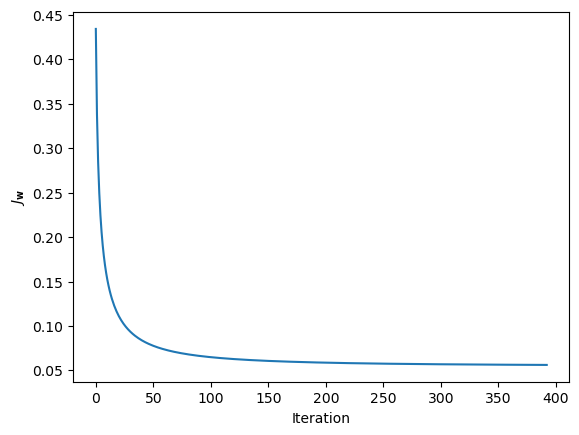

In [23]:
model.plot_cost_function() #Se grafica la función de costo.

La salida de la celda anterior de código es una gráfica donde se puede apreciar la relación entre la función de costo conforme avanzan las iteraciones del modelo.

### **13. Predicción del modelo**

El modelo entrenado se utiliza para hacer predicciones.

In [24]:
y_predictions = model.predict(X=X_test) #Realizar predicciones sobre el conjunto de prueba (X_test).

Esta celda de código no produce ninguna salida.

### **14. Obtención de parámetros**

Se obtienen los parámetros del entrenamiento.

In [25]:
model.get_parameters() #Obtención de los parámetros del modelo.

array([[-0.72815137],
       [ 0.20614421],
       [ 4.29723527],
       [ 0.95814606],
       [ 0.17301175],
       [-3.70904074]])

La salida de la celda de código son los pesos y el sesgo a lo largo del entrenamiento. Los cuales fueron obtenidos de la definición de los parámetros del modelo.

Siendo el sesgo [-3.709.]


### **15. Evaluacion del modelo**

Esta celda de código ejecuta la evaluación del modelo (y_predictions y y_test).

In [26]:
model.evaluate(y_hat=y_predictions, y=y_test) #Evaluacion del modelo.
#predicciones:y_predictions.
#reales:y_test.

0.9892996108949417

La salida de la celda de código es la precisión del modelo, en otras palabras, la exactitud del modelo con base en las predicciones correctas.

### **16. Definición de función para realizar la matriz de confusión**

Definimos la importación de la matriz de confusión. Esto nos permite realizar la matriz de confusión lo que nos permite acceder a las métricas pedidas(Accuracy, Precision, Recall, Specificity, F1-score).

In [29]:
from sklearn.metrics import confusion_matrix #Permite el uso de la matriz de confusión.

y_predictions = model.predict(X_test) > 0.5 #Las predicciones se comparan con 0.5 (true:si son mayores a 0.5)
c_matrix = confusion_matrix(y_true=y_test, y_pred=y_predictions) #Creación de matriz de confusión.

La celda anterior no genera salida.

### **17. Gráfico de matriz de confusión**

Se grafica la matriz de confusión. Se muestran los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

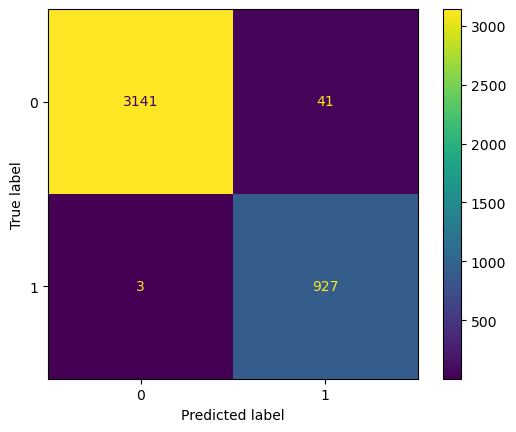

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay #Permite visualizar la matriz de confusión.
display_matrix = ConfusionMatrixDisplay(confusion_matrix=c_matrix) #Se iguala a c_matrix (celda de codigo anterior) para mostrar enseñar la matriz.
display_matrix.plot() #Despliegue da la matriz de confusión.

En el gráfico anterior se muestran los resultados obtenidos donde se puede interpretar como: 
- Verdadero positivo (3141): Valores reales positivos  y la prueba los predijo como positivos.
- Verdadero negativo (927): Valores reales negativos y la prueba los predijo como negativo.
- Falso negativo (3): Valores reales positivos y la prueba los predijo como negativo (Error tipo 2)
- Falso positivo (41): Valores reales negativos y la prueba los predijo como positivo (Error tipo 1)

### **18. Métricas de desempeño**

Se realizan los cálculos para las métricas de desempeño con base en la matriz de confusión, para luego ver los resultados desplegados.

In [32]:
def get_performance_metrics(c_matrix): #Permite el acceso a los datos de la matriz de confusión para obtener las métricas de desempeño.
    tn, fp, fn, tp = c_matrix[0][0], c_matrix[0][1], c_matrix[1][0], c_matrix[1][1] #Extracción de los valores de la matriz de confusión.

    accuracy = (tp + tn) / (tp + tn + fp + fn) #Cálculo de exactitud.
    precision = tp / (tp + fp) #Cálculo de presición.
    recall = tp / (tp + fn) #Cálculo de sensibilidad.
    specificity = tn / (tn + fp) #Especificidad.
    f1_score = 2 * (precision * recall)/(precision + recall) #Cálculo de F1-score.
    return accuracy, precision, recall, specificity, f1_score #Regresa los valores previamente calculados.

accuracy, precision, recall, specificity, f1_score = get_performance_metrics(c_matrix) #Obtener cálculo de las métricas.

print(f"Accuracy: {accuracy:0.6f}") #Desplegar Accuracy.(Exactitud)
print(f"Precision: {precision:0.6f}") #Desplegar Presicion.
print(f"Recall: {recall:0.6f}") #Desplegar Recall. (Sensibilidad)
print(f"Specificity: {specificity:0.6f}") #Desplegar Specificity. (Especificidad)
print(f"F1-score: {f1_score:0.6f}") #Desplegar F1-Score. ()

Accuracy: 0.989300
Precision: 0.957645
Recall: 0.996774
Specificity: 0.987115
F1-score: 0.976818


- Accuracy: 0.989300
- Precision: 0.957645
- Recall: 0.996774
- Specificity: 0.987115
- F1-score: 0.976818

El modelo tiene una exactitud muy cercana al "1" lo que lo hace un modelo con una fuerte confiabilidad, esto porque las predicciones son casi del 100% correctas.

La precisión (95%) del modelo de igual manera , es alto, lo que indica que las predicciones del modelo referente a una afirmación positiva son casi en 96% correctas.

La sensibilidad (99%) al igual que las demás métricas presenta un porcentaje alto, lo que nos indica que el modelo esta excelentemente balanceado. (omite pocos falsos negativos).

La especificidad (98%) en este caso nos indica también que prácticamente no hay errores respecto ala identificación de casos positivos cuando deben de ser negativos, en pocas palabras, detecta con alto porcentaje los casos negativos.

El F1-score con un porcentaje de 97% indica que la sensibilidad y la precisión están en balance.


- Accuracy (exactitud): Cercanía del resultado de una medición al valor verdadero (relacionada con el sesgo).

- Precisión: Dispersión del conjunto de valores obtenidos a partir de mediciones repetidas de una magnitud.
    - Cuando menor es la dispersión mayor la precisión.

- Recall (Sensibilidad): Indica la capacidad del estimador para discriminar los casos positivos, de los negativos.
    - Proporción de casos positivos que fueron correctamente identificados.

- Specificity (Especificidad): Indica la capacidad del estimador para discriminar los casos positivos, de los negativos.
    - Casos negativos que se han clasificado correctamente.
    
- F1-Score: Resumen de precisión y sensibilidad en una sola métrica.

Segun (Arce, 2024): 4 casos
- **Alta precisión y alto recall**: el modelo de Machine Learning escogido maneja perfectamente esa clase.

- **Alta precisión y bajo recall**: el modelo de Machine Learning escogido no detecta la clase muy bien, pero cuando lo hace es altamente confiable.

- **Baja precisión y alto recall**: El modelo de Machine Learning escogido detecta bien la clase,  pero también incluye muestras de la otra clase.

- **Baja precisión y bajo recall**: El modelo de Machine Learning escogido no logra clasificar la clase correctamente.



### **C. Model selection and discussions**

| **Métrica**   | **From Scratch** | **Tensorflow** |
|---------------|------------------|----------------|
| Accuracy      | 0.989300          | 0.989786       |
| Precision     | 0.957645          | 0.959627       |
| Recall        | 0.996774          | 0.996774       |
| Specificity   | 0.987115          | 0.987744       |
| F1-score      | 0.976818          | 0.977848       |

En la tabla anterior se puede ver la comparación de las métricas de ambos modelos, sin tensorflow y con tensorflow.


Una de las primeras observaciones es que el uso de tensorflow, sin duda alguna, mejoró el rendimiento del modelo en términos generales, teniendo como comparación el modelo sin tensorflow, aunque cabe recalcar que las métricas del modelo sin tensorflow a comparación del modelo con tensorflow son prácticamente iguales, la diferencia en las métricas de dichos modelos es mínima.


Si tenemos que decidir cuál de esos es mejor, en término de las métricas, yo daría que el de tensorflow, ya que estas tienen mejores índices de desempeño (siendo algo mínimo).


Las razones de esta mejoría pueden ser los diferentes beneficios que trae consigo el uso de tensorflow como:

- Optimización y eficiencia: Mejora de precisión y la eficiencia del modelo.

- Algoritmos avanzados: Regularización, Optimización, ajuste de hiperparámetros.

- Escalabilidad: manejo de grandes volúmenes de datos.


No obstante, si tuviera que decidir sobre si usar uno u otro, me decidirá por el que no usa tensorflow. Esto porque, en este caso, las métricas son prácticamente iguales, entonces el uso de tenworflow requeriría mayor poder computacional.

# **Conclusión**

Esta tarea, específicamente el código de sigmoid-perceptron-from-scratch fue enriquecedora esto porque como la tarea pasada ahora me siento más en confianza al momento de ver un código con inteligencia artificial, así como entender que se refiere cada línea y lograr entender más la metodología que se sigue en el desarrollo de un algoritmo de clasificación. Asimismo aprendí para qué sirve una matriz de confusión e interpretar las métricas que la misma matriz brinda.


La tarea fue tardada, pero sin duda alguna me ayudo a aprender, espero seguir aprendiendo a lo largo del curso y ganar más confianza/experiencia respecto al desarrollo o entendimiento de algoritmos de inteligencia artificial.

# **Referencias**

Rojas-Jimenez, K. (n.d.). Ciencia de Datos para Ciencias Naturales. Retrieved from https://bookdown.org/keilor_rojas/CienciaDatos/introducci%C3%B3n-a-ciencia-de-datos-en-python.html

TensorFlow. (n.d.). TensorFlow. https://www.tensorflow.org/?hl=es

Getting started. (n.d.). Scikit-learn. https://scikit-learn.org/stable/getting_started.html


matplotlib.figure.Figure — Matplotlib 3.9.2 documentation. (n.d.). https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html

Utility Functions - pyod 2.0.1 documentation. (n.d.). https://pyod.readthedocs.io/en/latest/pyod.utils.html

train_test_split. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Team, K. (n.d.). Keras documentation: Adam. https://keras.io/api/optimizers/adam/

Team, K. (n.d.). Keras documentation: Weights-only saving & loading. https://keras.io/2.15/api/models/model_saving_apis/weights_saving_and_loading/

StandardScaler | Interactive Chaos. (n.d.). https://interactivechaos.com/es/manual/tutorial-de-machine-learning/standardscaler

GeeksforGeeks. (2018, December 17). Python | pandas.to_numeric method. GeeksforGeeks. https://www.geeksforgeeks.org/python-pandas-to_numeric-method/

Platzi. (n.d.). que significa cuando ddice  shuffle=true? platzi.com. https://platzi.com/discusiones/2263-redes-neuronales/191722-que-significa-cuando-ddice-shuffletrue/

Navarro, S. (2024, July 22). Normalizar los datos en Deep Learning [2024] | KeepCoding. KeepCoding Bootcamps. https://keepcoding.io/blog/normalizar-los-datos-en-deep-learning/

Why should we use -> in def __init__(self, n) -> None:? (n.d.). Stack Overflow. https://stackoverflow.com/questions/64933298/why-should-we-use-in-def-init-self-n-none

Assert in Python: What is it and How to use it | BrowserStack. (2023, August 4). BrowserStack. https://www.browserstack.com/guide/assert-in-python

What is the meaning of “error threshold” in quantum error correction? (n.d.). Quantum Computing Stack Exchange. https://quantumcomputing.stackexchange.com/questions/35836/what-is-the-meaning-of-error-threshold-in-quantum-error-correction

Arce, J. I. B. (2024, September 13). La matriz de confusión y sus métricas. Juan Barrios. https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/

